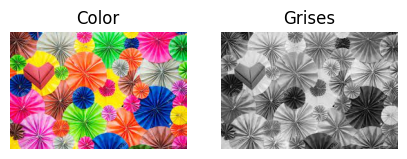

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [5,2.5]




def Imagen(turip):
    
    imageInicial = cv2.imread(turip)


    plt.subplot(121)
    plt.title("Color")
    plt.imshow(cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(122)
    plt.title("Grises")
    plt.imshow(cv2.cvtColor(imageInicial, cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.axis('off')


    imagenrgb = cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB)


    cv2.imwrite('ImagenRGB.jpg', imagenrgb)
    cv2.imwrite('SinColorsito.jpg', cv2.cvtColor(imageInicial, cv2.COLOR_BGR2GRAY))


    imagenrgb = cv2.cvtColor(imageInicial, cv2.COLOR_BGR2RGB)


Imagen(r"C:/Universidad/QuintoSemestre/PDI/Imagenes/dd3.jpg")